In [20]:
import matplotlib.pyplot as plt
import numpy as np
x_data = [338.,333.,328.,207.,226.,25.,179.,60.,208., 606.]
y_data = [640.,633.,619.,393.,428.,27.,193.,66.,226.,1591.]
#ydata = b + w * xdata 

In [21]:
x = np.arange(-200,-100,1) #bias
y = np.arange(-5,5,0.1)    #weight
z = np.zeros((len(x),len(y)))
X , Y = np.meshgrid(x,y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        z[j][i] = 0
        for n in range(len(x_data)):
            z[j][i] = z[j][i] + (y_data[n] - b - w*x_data[n])**2
        z[j][i] = z[j][i]/len(x_data)

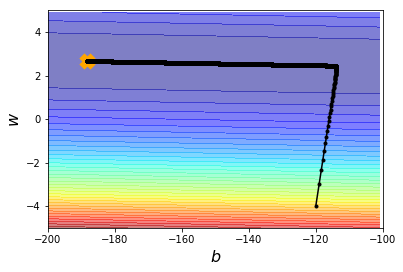

In [24]:
b = -120 #initial b
w = -4 #initial w
lr = 1 #learning rate
iteration = 100000

#store initial values for plotting
b_history = [b]
w_history = [w]

lr_b = 0
lr_w = 0

# Iterations
for i in range(iteration):
    b_gard = 0.0
    w_gard = 0.0
    for n in range(len(x_data)):
        b_gard = b_gard - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_gard = w_gard - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    lr_b = lr_b + b_gard **2
    lr_w = lr_w + w_gard **2
    
    #Update parameters
    b = b - lr/np.sqrt(lr_b) * b_gard
    w = w - lr/np.sqrt(lr_w) * w_gard
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

#plot the figure
plt.contourf(x,y,z,50,alpha = 0.5,cmap = plt.get_cmap('jet'))
plt.plot([-188.4],[2.67],"X",ms=12,markeredgewidth = 3 ,color = "orange")
plt.plot(b_history,w_history,"o-",ms = 3,lw=1.5,color="black")
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize = 16)
plt.ylabel(r'$w$',fontsize = 16)
plt.show()